<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw05_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Monte Carlo for integral**

### **Example 1:**

Our goal is to compute, using OMC by exact sampling

$$\alpha = \int_{0}^{1} h(x) \, d x$$

where 

$$h(x) = 100 I_{(0, 1/100)} (x) + 1 I_{(1/100, 1)} (x).$$

The exact value shall be $\alpha = 1.99$.

- Implement the Algorithm 1 for estimator $\hat{\alpha}_{N}$;

- Estimae $MSE(\hat{\alpha}_{N})$ for $N = 2^{5}, \dots, 2^{10}$ and plot log-log chart.

**Analysis:**

We write

$$\alpha = \mathbb{E}[X] = \mathbb{E}[h(Y)],$$

where $X = h(Y)$ and $Y \sim U(0, 1)$. In other words, although $X$-sampling is not directly avaliable in python, one can use $U(0, 1)$ random variable generator to produce $Y_{i}$, then compute $h(Y_{i})$ for the samle $X_{i}$.

In [0]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [0]:
def h(x):
  if x > 0 and x < 0.01:
    y = 100
  elif x > 0.01 and x < 1:
      y = 1
  return y 

In [0]:
def mcintegral(n):
  s = 0
  for i in range(n):
    x = np.random.uniform(0,1)
    s = s + h(x)
  return s/n 

In [8]:
print('estimated value is:')
print(mcintegral(10000))

estimated value is:
1.7821


In [0]:
estimated_value_list = []


In [0]:
def mse_estimator(n,N):
  for i in range(0,N):
    mse1 = mcintegral(n)
    estimated_value_list.append(mse1)
  return np.var(estimated_value_list)

In [43]:
x = []
mse2 = []
N = 1000
for i in range(5,11):
  x1 = 2**i
  x.append(x1)
  mse2.append(mse_estimator(x1,N))
print('The estimated value for MSE is:')
print(mse2)


The estimated value for MSE is:
[1.9020132903814315, 1.8352035804538989, 1.5785293927635466, 1.3429252591936898, 1.1568708281382811, 1.0100156066656112]


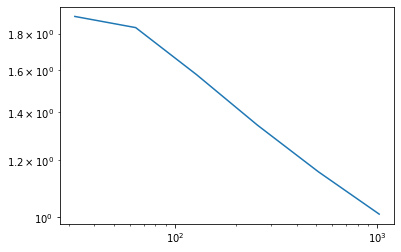

In [44]:
plt.loglog(x,mse2)